# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要了解的关于 Google 商店中应用的问题，例如，最受欢迎（下载量最高）的 Apps 有什么特征？哪些 App 的评分更高？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）
#### 问题：最受欢迎的app是什么类型？
 

**答案**：

## 数据评估和清理

In [2]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

--2019-12-03 10:35:19--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/opt/conda/lib/pyth 100%[===================>]   9.58M  3.55MB/s    in 2.7s    

2019-12-03 10:35:22 (3.55 MB/s) - ‘/opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [3]:
# load pacakges
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

In [4]:
# load the dataset
df_google = pd.read_csv('googleplaystore.csv')

In [5]:
# check the dataset general info
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df_google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
for i in df_google.columns:
    print('------------',i,'-----------------')
    print(df_google[i].unique())

------------ App -----------------
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...,
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
------------ Category -----------------
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
------------ Rating -----------------
[  4.1   3.9   4.7   4.5   4.3   4.4   3.8   4.2   4.6   3.2   4.    nan
   4.8   4.9   3.6   3.7   3.3   3.4   3.5   3.1   5.    2.6   3.    1.9
   2.5   2.8   2.7   1.    2.9

### Identified data wrangling problems:

- category, type, content rating, genres, installs 应该是 category 类型
- reviews,size 应该是 int 类型
- last updated 应该是 时间类型

### 更变量数据和类型错误

- 尝试修改列名

In [9]:
# 列名统一为小写
df_google.rename( columns = lambda x:x.lower().replace(' ','_'),inplace = True )

- 查看各列空值占比

In [10]:
df_google.isnull().mean()

app               0.000000
category          0.000000
rating            0.135965
reviews           0.000000
size              0.000000
installs          0.000000
type              0.000092
price             0.000000
content_rating    0.000092
genres            0.000000
last_updated      0.000000
current_ver       0.000738
android_ver       0.000277
dtype: float64

- 尝试 fillna 将空值填充为0

In [11]:
df_google.fillna(value = 0, inplace = True)

In [12]:
# 查看duplicated()行数
len(df_google[df_google.duplicated()])

483

In [13]:
# 清除duplicated()
df_google.drop_duplicates(inplace = True)

- 使genres和 category 相统一

In [14]:
df_google.genres.str.upper().str.replace('&','_').str.replace(' ','').str.split(';',expand = True).stack()

0      0              ART_DESIGN
1      0              ART_DESIGN
       1             PRETENDPLAY
2      0              ART_DESIGN
3      0              ART_DESIGN
4      0              ART_DESIGN
       1              CREATIVITY
5      0              ART_DESIGN
6      0              ART_DESIGN
7      0              ART_DESIGN
8      0              ART_DESIGN
9      0              ART_DESIGN
       1              CREATIVITY
10     0              ART_DESIGN
11     0              ART_DESIGN
12     0              ART_DESIGN
13     0              ART_DESIGN
14     0              ART_DESIGN
15     0              ART_DESIGN
16     0              ART_DESIGN
17     0              ART_DESIGN
18     0              ART_DESIGN
19     0              ART_DESIGN
20     0              ART_DESIGN
21     0              ART_DESIGN
22     0              ART_DESIGN
23     0              ART_DESIGN
       1        ACTION_ADVENTURE
24     0              ART_DESIGN
25     0              ART_DESIGN
          

### 清洗 installs

In [15]:
# 查看installs 的 unique()
df_google.installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [16]:
df_google[df_google.installs == 'Free']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,0,"February 11, 2018",1.0.19,4.0 and up,0


### 结果发现，第10472行 的数据发生了错位，没有‘category’ 值。更正这一行为正确的值。
- 该app 名为，Life Made WIFI Touchscreen Photo Frame,
- 推测 其 category 应该为“PHOTOGRAPHY”
- 因此为其赋值，并修正其他列的值。

In [17]:
# 把 index = 10472的 每一列 正确的 值取出来
d10472_values = df_google.loc[10472].values[0:12]
# 增加 photography 
d10472_values = np.insert(d10472_values,1,'PHOTOGRAPHY')
# 给 index = 10472 赋正确的值
df_google.loc[10472] = d10472_values

### 继续清洗 installs
- 查看 installs.unique(),发现，有一个值为 0.0, 其他均为 str
- 查找 值为 0.0的表格，发现只有一个。
- 将 0.0 的值改为 str,赋值为‘0’

In [18]:
df_google.installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
# 更改 0.0 为 str 类型
df_google.installs = df_google.installs.apply(lambda x: '0' if x==0 else x) 

In [20]:
# 查看更改是否正确
df_google.installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
# 转为 int 类型
df_google.installs = df_google.installs.str.rstrip('+').str.strip(',').str.replace(',','').astype(int)

In [22]:
# 检查 installs 清理结果
df_google.installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

### 清洗 size
- 如果是‘Varies with device’,则将 size 设置为0。
- 经检验‘VAries with device’ 共有1526个值。

In [23]:
len(df_google[df_google['size'] == 'Varies with device'])

1526

In [24]:
df_google['size'] = df_google['size'].apply(lambda x: float(x[:-1])*1000 if x[-1]=='M' 
                                            else 0 if x[0]=='V' else float(x[:-1]))

In [25]:
df_google['size'] = df_google['size'].astype('float')

### 清洗last_updated

In [26]:
# 查看 last_updated. unique()
df_google.last_updated.unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'], dtype=object)

In [27]:
df_google.last_updated = pd.to_datetime(df_google.last_updated)

### 清洗 category <br/>

In [28]:
# 查看 category.unique()
df_google.category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'], dtype=object)

In [29]:
df_google.category = df_google.category.astype('category')

### 清洗 rating

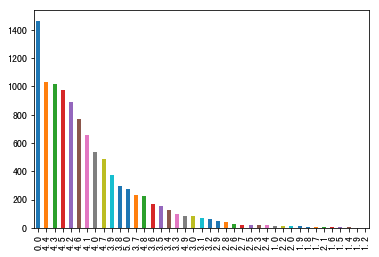

In [30]:
# 画bar 图查看数据。
df_google.rating.value_counts().plot(kind = 'bar')
# 结果发现， rating  = 0 有很多值，考虑，以后的数据分析中，不考虑0 值。

In [67]:
df_google.rating = df_google.rating.apply(lambda x: float(x))

In [68]:
df_google.rating = df_google.rating.astype('float')

### 清洗 reviews

In [31]:
# 查看 reviews.unique(),未 发现异常
# 更改 reviews 类型为 int
df_google.reviews = df_google.reviews.astype('int')

### 清洗 type

In [32]:
df_google.type.unique()

array(['Free', 'Paid', 0], dtype=object)

In [33]:
# 转为 category 类型
df_google.type = df_google.type.astype('category')

### 清洗 content_rating

In [34]:
df_google.content_rating = df_google.content_rating.astype('category')

### 清洗`price`

In [35]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
app               10358 non-null object
category          10358 non-null category
rating            10358 non-null object
reviews           10358 non-null int64
size              10358 non-null float64
installs          10358 non-null int64
type              10358 non-null category
price             10358 non-null object
content_rating    10358 non-null category
genres            10358 non-null object
last_updated      10358 non-null datetime64[ns]
current_ver       10358 non-null object
android_ver       10358 non-null object
dtypes: category(3), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 1.2+ MB


In [36]:
#  查看 price == 0 的 items数量。发现有9593个为0.
len(df_google[df_google['price']=='0'])

9593

In [41]:
df_google.price = df_google.price.astype('float')

### 清理gengres，设置为 category类型

In [47]:
df_google.genres = df_google.genres.astype('category')

### current_ver 和 android_ver 暂时不作处理

### 数据清理完毕 ！

## 数据探索分析

In [149]:
# 计算各个 category 的 app的 统计数据
df_grouped_mean = df_google.groupby(['category'],as_index = False).mean()

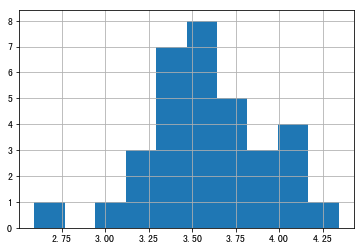

In [150]:
# 画评分Rating的 频率直方图
df_grouped_mean['rating'].hist()

In [160]:
df_rating = df_grouped_mean.sort_values('rating',ascending = False)

In [162]:
df_rating.head()

,category,rating,reviews,size,installs,price
8,EDUCATION,4.342308,1.781962e+05,14826.015385,4.107323e+06,0.138154
0,ART_AND_DESIGN,4.156923,2.637600e+04,11800.000000,1.912894e+06,0.091846
9,ENTERTAINMENT,4.136036,4.285650e+05,13664.864865,2.212306e+07,0.071892
14,GAME,4.101784,1.262745e+06,39363.826940,2.813918e+07,0.256289
5,COMICS,4.016667,5.638793e+04,11462.550000,9.347692e+05,0.000000


- 直方图中，可以看出，共有5个categories 的平均评分超过了4分，找出这5类category
- 前5类分别为： Education, art and design, entertainment, game, comics

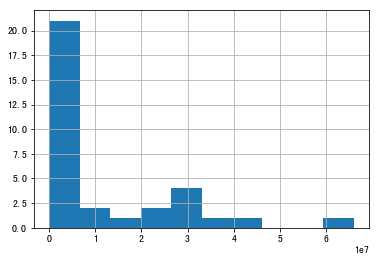

In [155]:
# 画 下载量 installs 的 直方图
df_grouped_mean['installs'].hist()

In [164]:
df_installs = df_grouped_mean.sort_values('installs',ascending = False)

In [166]:
df_installs.head()

,category,rating,reviews,size,installs,price
6,COMMUNICATION,3.482240,1.642824e+06,8281.904372,6.598983e+07,0.227158
27,SOCIAL,3.707857,1.905632e+06,12234.975000,4.469239e+07,0.057036
31,VIDEO_PLAYERS,3.715429,6.307439e+05,12040.457143,3.555430e+07,0.059771
25,PRODUCTIVITY,3.448157,2.519767e+05,9456.434889,3.062185e+07,0.616536
24,PHOTOGRAPHY,3.942724,6.324998e+05,12672.405573,3.009675e+07,0.378421


- 下载量前5名类别分别是： communication, social, video_players, productivity, photography

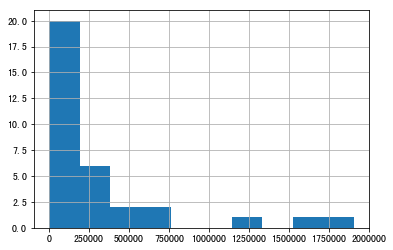

In [156]:
# 画 评论数 reviews 的频率直方图
df_grouped_mean['reviews'].hist()

- reviews 和 installs 貌似成正相关

In [167]:
df_reviews = df_grouped_mean.sort_values('reviews',ascending = False)

In [168]:
df_reviews.head()

,category,rating,reviews,size,installs,price
27,SOCIAL,3.707857,1.905632e+06,12234.975000,4.469239e+07,0.057036
6,COMMUNICATION,3.482240,1.642824e+06,8281.904372,6.598983e+07,0.227158
14,GAME,4.101784,1.262745e+06,39363.826940,2.813918e+07,0.256289
24,PHOTOGRAPHY,3.942724,6.324998e+05,12672.405573,3.009675e+07,0.378421
31,VIDEO_PLAYERS,3.715429,6.307439e+05,12040.457143,3.555430e+07,0.059771


- 评论数前5名类别分别是： social, communication, game, photography, video_players

### 观察结果
- 前5名 `评分`、`下载量`、`评论数` 三个指标，没有一个是三者共同的类别
- 其中 `game` 是 评分前5名中 唯一 和 评论数前5名重复的类别, 再次查看installs的排名，发现game的下载量`installs`排在第6位。


## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：
1. 评分前5名的类别是 `Education`, `art and design`, `entertainment`, `game`, `comics`
2. 下载量前5名的类别是：`communication`, `social`, `video_players`, `productivity`, `photography`
   另外，`game`排第6位
3. 评论数前5名类别分别是： `social`, `communication`, `game`, `photography`, `video_players`
4. 结论：
    - 评分、下载量和评论数 均靠前的 类别是： `Game`，是最受欢迎的APP类型
    - 下载量 和 评论数 多的 APP类别 并没有对应很高的评分，但是两者的前5名有4项重合。说明用户下载量和评论数有可能是相关的。可后续进一步分析。
    - 评分前5名的类别中 只有4类下载量和评论数也很高。说明高评分不代表受众广。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
- 分析中，尝试根据 评分、下载量和评论数 来找出最受欢迎的APP类别。该分析中，抽取了各指标的前5名来进行考虑，可以做更多的比如前10名。
- 如果数据集再包含用户使用频次，将有助于更好地找出最受欢迎app类别。

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。